In [410]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from datetime import date, timedelta
import win32com.client as win32
import teradatasql
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [411]:
#
# pass  
user="vitaly.flerin"
password="4GyyERMq!!!"
query = '''select * from uat_ca.vf_alladin_250523'''
with teradatasql.connect(host="td2800.corp.tele2.ru", user=user, password=password,logmech="ldap", tmode="TERA" ) as connect:
    df = pd.read_sql(query, connect)
df.head()

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_6352\295591126.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connect)


,create_date,cluster_name,macroregion,region,branch_id,cust_id,subs_id,msisdn,point_name,nps,...,data_gb,data_gr,CREATE_DTTM,EVENT_DATE_TO_RTK,EVENT_DATE_INSTAL,ALLADIN_SYSTEM,LAST_STATUS_NAME,REASON,diff_day,flg_conv
0,2022-11-30,Challenger,Урал,Екатеринбург,99.0,3.000006e+11,3.000007e+11,79505629758,Голос и СМС,10,...,13.033143,от 10-30,NaT,None,NaT,None,None,None,NaN,0
1,2023-02-16,Defender,Волга,Н.Новгород,13.0,2.000859e+11,2.000846e+11,79200410377,Контакт-центр,9,...,9.405447,10,NaT,None,NaT,None,None,None,NaN,0
2,2022-12-01,Challenger,Сибирь,Новосибирск,23.0,1.000609e+11,1.000608e+11,79014587512,Мобильный интернет,1,...,115.899388,100+,NaT,None,NaT,None,None,None,NaN,0
3,2022-04-04,Challenger,Юг,Волгоград,64.0,6.290447e+07,6.208242e+07,79023855002,Мобильный интернет,10,...,10.399204,от 10-30,NaT,None,NaT,None,None,None,NaN,0
4,2023-02-20,Challenger Elite,Сибирь,Томск,24.0,1.000230e+11,1.000230e+11,79539132401,Мобильный интернет,10,...,10.281038,от 10-30,NaT,None,NaT,None,None,None,NaN,0


In [332]:
#Оригинальные данные по конвергенту для оценки количества
# pass  
query_2 = '''select * from uat_ca.mc_alladin_subs'''
with teradatasql.connect(host="td2800.corp.tele2.ru", user=user, password=password,logmech="ldap", tmode="TERA" ) as connect:
    df_con = pd.read_sql(query_2, connect)
df_con.head()

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_6352\1495172990.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_con = pd.read_sql(query_2, connect)


,CREATE_DTTM,EVENT_DATE_TO_RTK,EVENT_DATE_INSTAL,ALLADIN_SYSTEM,LAST_STATUS_NAME,REASON,MSISDN_REQ,SUBS_ID,SERVICE_ID,service_name,SERVICE_STATUS_NAME,VALID_FROM_DTTM,STATUS_CHANGE_REASON_NAME,EVENT_DTTM_REQ,END_STATUS,GR_CHANNEL,abonent
0,2022-12-15 20:08:16,None,NaT,WD,Отменена,Не дозвонились абоненту (финальный звонок),79017428470,3.000468e+11,NaN,None,None,NaT,None,NaT,None,CBM,0
1,2022-08-23 12:21:55,None,NaT,DSUITE,Отменена,Длительное отсутствие клиента,79267249578,3.000223e+11,NaN,None,None,NaT,None,NaT,None,DSUITE,0
2,2023-03-14 11:28:43,2023-03-14 11:45:03,2023-03-20 10:15:35,DSUITE,Инсталляция выполнена,Не указана,79637129964,3.000324e+11,27156.0,Домашний интернет 100 Мбит/с (MO),Активна,2023-03-20 10:16:47,Действия пользователя (пользовательская причин...,2023-03-20 10:15:35,Активна,DSUITE,1
3,2023-04-22 14:44:14,None,NaT,DSUITE,Отменена,Не дозвонились абоненту (финальный звонок),79516888808,1.524015e+07,NaN,None,None,NaT,None,NaT,None,DSUITE,0
4,2022-06-13 11:26:21,2022-06-13 12:14:17,2022-06-15 11:28:56,DSUITE,Инсталляция выполнена,Не указана,79774928577,3.000359e+11,27156.0,Домашний интернет 100 Мбит/с (MO),Активна,2022-06-15 11:29:56,Действия пользователя (пользовательская причин...,2022-06-15 11:28:56,None,DSUITE,1


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264147 entries, 0 to 1264146
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   create_date        1264147 non-null  object        
 1   cluster_name       1264147 non-null  object        
 2   macroregion        1264147 non-null  object        
 3   region             1264147 non-null  object        
 4   branch_id          1264147 non-null  float64       
 5   cust_id            1264147 non-null  float64       
 6   subs_id            1264147 non-null  float64       
 7   msisdn             1264147 non-null  object        
 8   point_name         1264147 non-null  object        
 9   nps                1264147 non-null  int64         
 10  nps_key            1264147 non-null  int64         
 11  lt_gr              1264147 non-null  object        
 12  age_gr             1264147 non-null  object        
 13  gender             1264147 

In [ ]:
дубли глянуть 

Оцениваем распределение

(Имеется неравномерное распределенеие по ТК, тем самым, эффект будет буольше всего оказываться на кц и монобренды и не оказывать на МИ, в то время как распределение nps скошено наоборот в МИ)

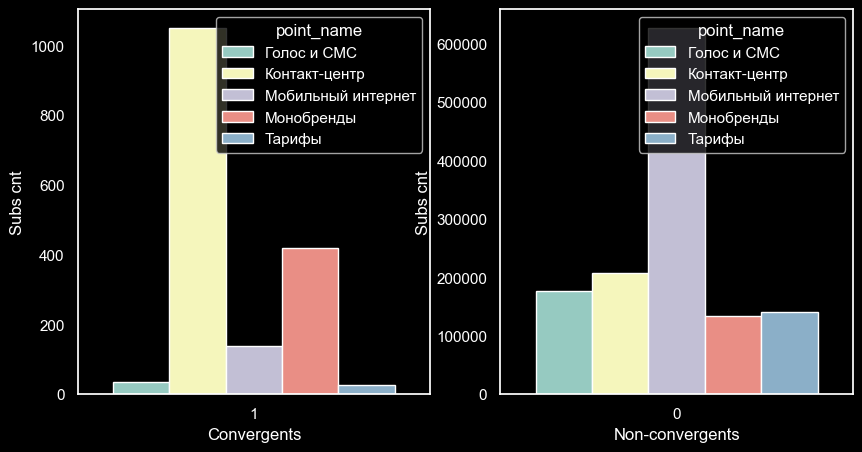

In [412]:
t1 = df.query("flg_conv == 1")
t2 = df.query("flg_conv == 0")
fig, axs = plt.subplots(1, 2, figsize=(10,5))

order = df['point_name'].unique() # получаем уникальные значения исходной переменной
palette = sns.color_palette() # получаем текущую палитру

sns.countplot(x='flg_conv', data=t1, hue='point_name', ax=axs[0], order=[1], hue_order=order, palette=palette) # order=[1, 0] указываем руками фильтр 
sns.countplot(x='flg_conv', data=t2, hue='point_name', ax=axs[1], order=[0], hue_order=order, palette=palette)
axs[0].set_xlabel("Convergents")
axs[1].set_xlabel("Non-convergents")
axs[0].set_ylabel("Subs cnt")
axs[1].set_ylabel("Subs cnt")

# Убираем сетку
axs[0].grid(False)
axs[1].grid(False)

plt.show()

Средний NPS в  разрезе ТК

(Те, кто пользуются конвергентом, в ТК к-ц оценивают нас лучше, чем те, у кого его нет) 

по идее, есть в этом логика, звонки в к-ц  - негативный опыт, но при подключении конвергента - негатива нет

,point_name,subs_id,diff_day,nps_key
0,Голос и СМС,172132,48,0.404486
1,Контакт-центр,206044,1302,0.179797
2,Мобильный интернет,617842,198,0.250111
3,Монобренды,130303,562,0.556580
4,Тарифы,137826,44,0.390413


,point_name,subs_id,diff_day,nps_key
0,Голос и СМС,172084,0,0.404454
1,Контакт-центр,204742,0,0.177052
2,Мобильный интернет,617644,0,0.250055
3,Монобренды,129741,0,0.555800
4,Тарифы,137782,0,0.390370


,point_name,subs_id,diff_day,nps_key
0,Голос и СМС,48,48,0.520833
1,Контакт-центр,1302,1302,0.611367
2,Мобильный интернет,198,198,0.424242
3,Монобренды,562,562,0.736655
4,Тарифы,44,44,0.522727


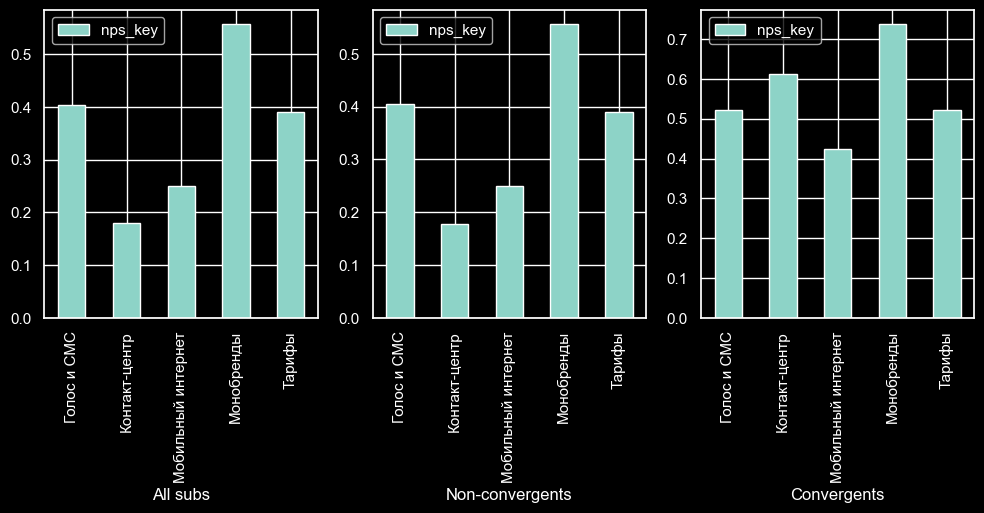

In [289]:
display(df.groupby(['point_name'], as_index=False).agg({"subs_id": "count", "diff_day":"count", "nps_key": "mean" }))
display(df.query("diff_day.isna()").groupby(['point_name'], as_index=False).agg({"subs_id": "count", "diff_day":"count", "nps_key": "mean" }))
display(df.query("diff_day.notna()").groupby(['point_name'], as_index=False).agg({"subs_id": "count", "diff_day":"count", "nps_key": "mean" }))

fig, axes = plt.subplots(ncols=3, figsize=(12,4))
df.groupby(['point_name'], as_index=False).agg({"subs_id": "count", "diff_day":"count", "nps_key": "mean" }).plot( y= "nps_key", x ="point_name", kind="bar", ax=axes[0]),
df.query("diff_day.isna()").groupby(['point_name'], as_index=False).agg({"subs_id": "count", "diff_day":"count", "nps_key": "mean" }).plot( y= "nps_key", x ="point_name", kind="bar", ax=axes[1])
df.query("diff_day.notna()").groupby(['point_name'], as_index=False).agg({"subs_id": "count", "diff_day":"count", "nps_key": "mean" }).plot( y= "nps_key", x ="point_name", kind="bar", ax=axes[2])

axes[0].set_xlabel("All subs")
axes[1].set_xlabel("Non-convergents")
axes[2].set_xlabel("Convergents")

plt.show()

Квартальная динамика NPS

(Влияния конвергента на NPS нет/минимально(визуально))


C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_6352\1004224662.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grouped_ = df.query("flg_conv == 0")[df['point_name'] == point_].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_6352\1004224662.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grouped_ = df.query("flg_conv == 0")[df['point_name'] == point_].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_6352\1004224662.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grouped_ = df.query("flg_conv == 0")[df['point_name'] == point_].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "

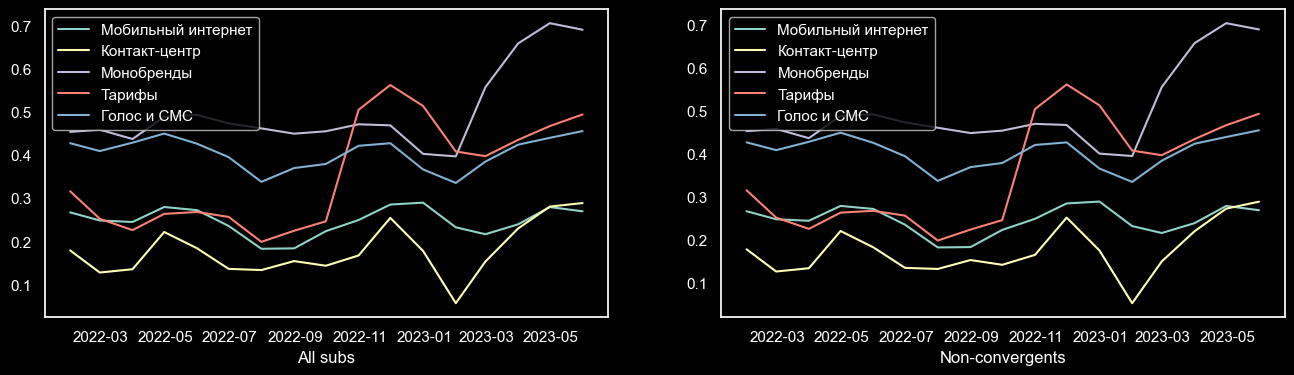

In [299]:
#df['create_date'] = pd.to_datetime(df['create_date'])
# создаем график
#fig, ax = plt.subplots(figsize=(12,4))
fig, ax = plt.subplots(ncols=2, figsize=(16,4))
# группируем данные по точке продаж и дню создания, далее для каждой уникальной категории рисуем свою линию на графике
for point in df['point_name'].unique():
    df_grouped = df[df['point_name'] == point].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
    ax[0].plot(df_grouped.index, df_grouped['nps_key'], label=point)

for point_ in df['point_name'].unique():
    df_grouped_ = df.query("flg_conv == 0")[df['point_name'] == point_].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
    ax[1].plot(df_grouped_.index, df_grouped_['nps_key'], label=point_)

# добавляем легенду на график
ax[0].legend()
ax[1].legend()
# Убираем сетку
ax[0].grid(False)
ax[1].grid(False)

ax[0].set_xlabel("All subs")
ax[1].set_xlabel("Non-convergents")

# отображаем график
plt.show()

Динамика абонентов, по месяцам

(22г. -  бессмыленный для оценки и сравнения, основная масса новых абонентов в 1q 23года )

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_6352\3654030245.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grouped = df.query("flg_conv == 0")[df['point_name'] == point].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_6352\3654030245.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grouped = df.query("flg_conv == 0")[df['point_name'] == point].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_6352\3654030245.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grouped = df.query("flg_conv == 0")[df['point_name'] == point].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
C

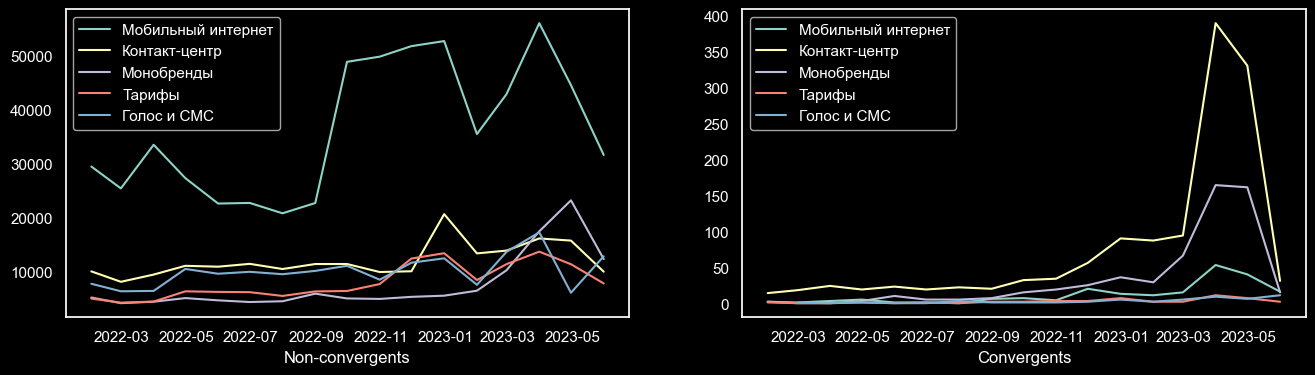

In [302]:
#df['create_date'] = pd.to_datetime(df['create_date'])
# создаем график
#fig, ax = plt.subplots(figsize=(12,4))
fig, ax = plt.subplots(ncols=2, figsize=(16,4))
# группируем данные по точке продаж и дню создания, далее для каждой уникальной категории рисуем свою линию на графике
for point in df['point_name'].unique():
    df_grouped = df.query("flg_conv == 0")[df['point_name'] == point].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
    ax[0].plot(df_grouped.index, df_grouped['subs_id'], label=point)

for point_ in df['point_name'].unique():
    df_grouped_ = df.query("flg_conv == 1")[df['point_name'] == point_].groupby(pd.Grouper(key='create_date', freq='M')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
    ax[1].plot(df_grouped_.index, df_grouped_['subs_id'], label=point_)

# добавляем легенду на график
ax[0].legend()
ax[1].legend()
# Убираем сетку
ax[0].grid(False)
ax[1].grid(False)

ax[0].set_xlabel("Non-convergents")
ax[1].set_xlabel("Convergents")

# отображаем график
plt.show()

Динамика без разбивки на ТК

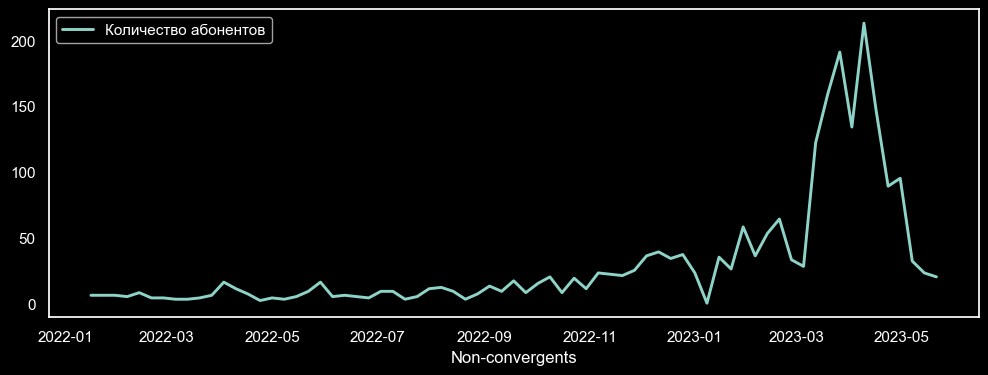

In [324]:
df_grouped = df.query("diff_day.notna()").groupby(pd.Grouper(key='create_date', freq='W')).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean"})
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(df_grouped.index, df_grouped['subs_id'], label="Количество абонентов", linewidth=2.1) # задаем текст для легенды и меняем толщину линии
ax.legend(loc='best')
# Убираем сетку
ax.grid(False)
ax.set_xlabel("Non-convergents")
# отображаем график
plt.show()

EDA конвергента


In [372]:
df_con.head()

,CREATE_DTTM,EVENT_DATE_TO_RTK,EVENT_DATE_INSTAL,ALLADIN_SYSTEM,LAST_STATUS_NAME,REASON,MSISDN_REQ,SUBS_ID,SERVICE_ID,service_name,SERVICE_STATUS_NAME,VALID_FROM_DTTM,STATUS_CHANGE_REASON_NAME,EVENT_DTTM_REQ,END_STATUS,GR_CHANNEL,abonent
0,2022-12-15 20:08:16,None,NaT,WD,Отменена,Не дозвонились абоненту (финальный звонок),79017428470,3.000468e+11,NaN,None,None,NaT,None,NaT,None,CBM,0
1,2022-08-23 12:21:55,None,NaT,DSUITE,Отменена,Длительное отсутствие клиента,79267249578,3.000223e+11,NaN,None,None,NaT,None,NaT,None,DSUITE,0
2,2023-03-14 11:28:43,2023-03-14 11:45:03,2023-03-20 10:15:35,DSUITE,Инсталляция выполнена,Не указана,79637129964,3.000324e+11,27156.0,Домашний интернет 100 Мбит/с (MO),Активна,2023-03-20 10:16:47,Действия пользователя (пользовательская причин...,2023-03-20 10:15:35,Активна,DSUITE,1
3,2023-04-22 14:44:14,None,NaT,DSUITE,Отменена,Не дозвонились абоненту (финальный звонок),79516888808,1.524015e+07,NaN,None,None,NaT,None,NaT,None,DSUITE,0
4,2022-06-13 11:26:21,2022-06-13 12:14:17,2022-06-15 11:28:56,DSUITE,Инсталляция выполнена,Не указана,79774928577,3.000359e+11,27156.0,Домашний интернет 100 Мбит/с (MO),Активна,2022-06-15 11:29:56,Действия пользователя (пользовательская причин...,2022-06-15 11:28:56,None,DSUITE,1


кол-во subs, динамика

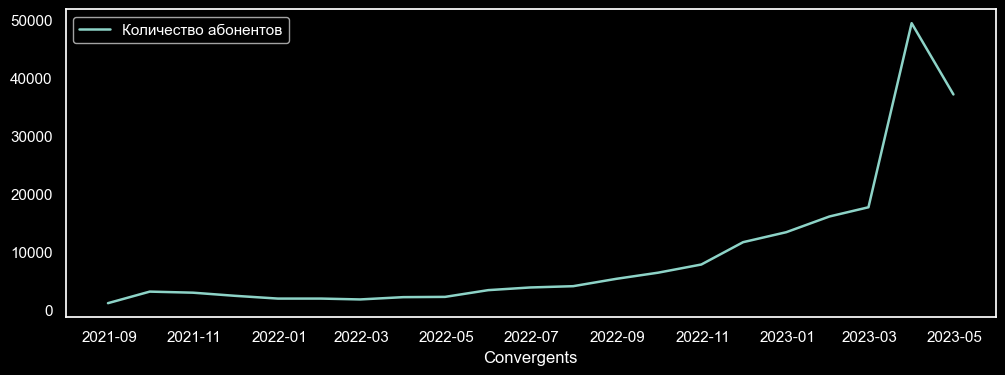

In [342]:
t = df_con.groupby(pd.Grouper(key='CREATE_DTTM', freq='M')).agg({"SUBS_ID": "count"})
fig, ax = plt.subplots(figsize=(12,4))
ax.plot( t['SUBS_ID'], label="Количество абонентов", linewidth=1.8) # задаем текст для легенды и меняем толщину линии
ax.legend(loc='best')
# Убираем сетку
ax.grid(False)
ax.set_xlabel("Convergents")
# отображаем график
plt.show()

Динамика по статусам

(Большое количество отмен, интересна причина) В целом, как и предполагалось, кратный рост подключений также приходится на 1 квартал 23г

C:\Users\vitaly.flerin\AppData\Local\Temp\ipykernel_6352\273529544.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_grouped = df_con.query("LAST_STATUS_NAME == 'Инсталляция выполнена'")[df_con['LAST_STATUS_NAME'] == 'Инсталляция выполнена'].groupby(pd.Grouper(key='CREATE_DTTM', freq='Q')).agg({"SUBS_ID": "count"})


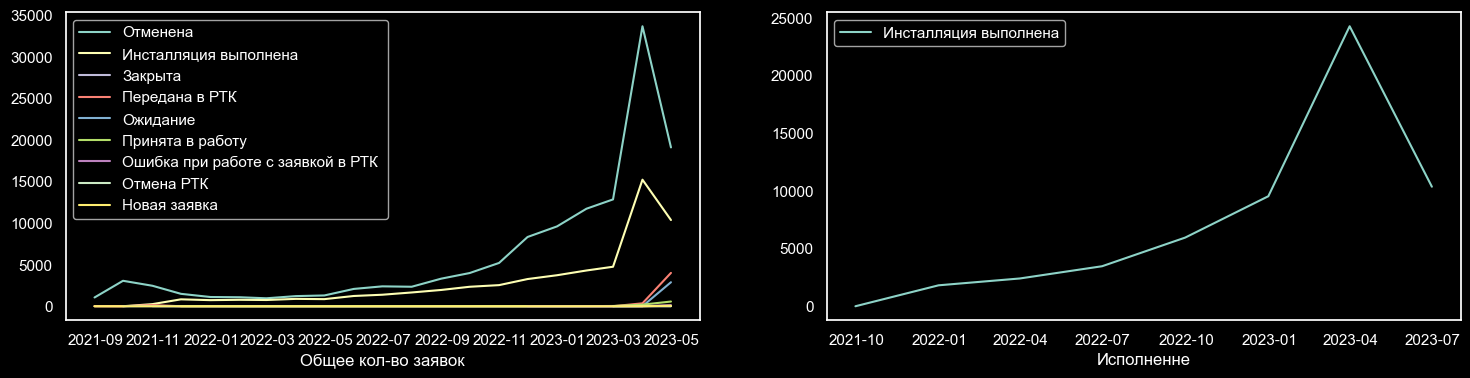

In [405]:
#t = df_con.groupby(pd.Grouper(key='CREATE_DTTM', freq='M')).agg({"SUBS_ID": "count"})
fig, ax = plt.subplots(ncols=2, figsize=(18,4))

for status in df_con['LAST_STATUS_NAME'].unique():
    df_grouped_ = df_con[df_con['LAST_STATUS_NAME'] == status].groupby(pd.Grouper(key='CREATE_DTTM', freq='M')).agg({"SUBS_ID": "count"})
    ax[0].plot(df_grouped_.index, df_grouped_['SUBS_ID'], label=status)

df_grouped = df_con.query("LAST_STATUS_NAME == 'Инсталляция выполнена'")[df_con['LAST_STATUS_NAME'] == 'Инсталляция выполнена'].groupby(pd.Grouper(key='CREATE_DTTM', freq='Q')).agg({"SUBS_ID": "count"})
ax[1].plot(df_grouped.index, df_grouped['SUBS_ID'], label="Инсталляция выполнена")

# добавляем легенду на график
ax[0].legend()
ax[1].legend()
# Убираем сетку
ax[0].grid(False)
ax[1].grid(False)
ax[0].set_xlabel("Общее кол-во заявок")
ax[1].set_xlabel("Исполненне")

# отображаем график
plt.show()

Считаем обущую конверсию

In [388]:
# количество уникальных абонентов
unique_subs = df_con['SUBS_ID'].nunique()

# количество подключенных услуг
connected_services = df_con[df_con['LAST_STATUS_NAME'] == 'Инсталляция выполнена']['SUBS_ID'].count()

# конверсия подключенных услуг
service_conversion = connected_services / unique_subs * 100

print('Количество уникальных абонентов:', unique_subs)
print('Количество подключенных услуг:', connected_services)
print('Конверсия подключенных услуг(в среднем):', service_conversion, '%')

Количество уникальных абонентов: 175746
Количество подключенных услуг: 57844
Конверсия подключенных услуг(в среднем): 32.913409124531995 %


Детализируем конверсию

In [383]:

# группировка по месяцу и статусу подключения услуги
monthly_data = df_con[["CREATE_DTTM", "LAST_STATUS_NAME", "SUBS_ID"]].groupby([pd.Grouper(key='CREATE_DTTM', freq='M'), 'LAST_STATUS_NAME']).count().reset_index()
# фильтрация по статусу "Инсталляция выполнена"
connected_services = monthly_data[monthly_data['LAST_STATUS_NAME'] == 'Инсталляция выполнена']

# группировка по месяцу и подсчет уникальных абонентов и их количество
grouped_data = df_con.groupby([pd.Grouper(key='CREATE_DTTM', freq='M')]).agg({'SUBS_ID': 'nunique', 'LAST_STATUS_NAME': 'count'}).reset_index()
# соединение данных с количеством подключенных услуг
final_data = pd.merge(grouped_data, connected_services[['CREATE_DTTM', 'SUBS_ID']], on='CREATE_DTTM', how='left')
final_data = final_data.rename(columns={'SUBS_ID_x': 'unique_subs', 'LAST_STATUS_NAME': 'total_subs', 'SUBS_ID_y': 'connected_services'})
# вычисление конверсии для каждого месяца
final_data['service_conversion'] = final_data['connected_services'] / final_data['unique_subs'] * 100

# вывод данных
final_data

,CREATE_DTTM,unique_subs,total_subs,connected_services,service_conversion
0,2021-08-31,1016,1397,6,0.590551
1,2021-09-30,2863,3686,1,0.034928
2,2021-10-31,2678,3255,256,9.559373
3,2021-11-30,2220,2612,831,37.432432
4,2021-12-31,1778,1968,734,41.282340
5,2022-01-31,1787,2026,776,43.424734
6,2022-02-28,1644,1908,751,45.681265
7,2022-03-31,2004,2252,887,44.261477
8,2022-04-30,2083,2231,855,41.046567
9,2022-05-31,3168,3448,1234,38.952020


Динамика на графике

(очевидное снижение конверсии, негативный тренд, что в дальнейшем может перерасти в негативный фактор для NPS, если не выявить причины(снижение качества продукта, нецелевой трафик, изменение поведения пользователей) и не устранить)

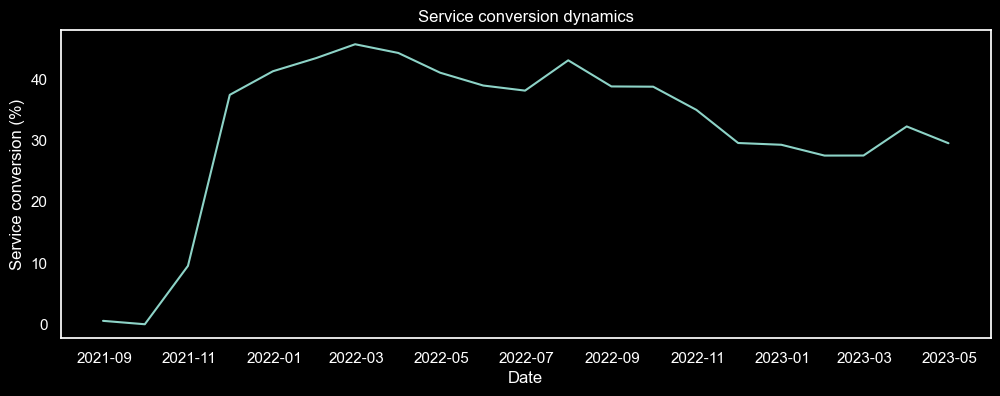

In [387]:
fig, ax = plt.subplots(figsize=(12,4))
plt.plot(final_data['CREATE_DTTM'], final_data['service_conversion'])
plt.title('Service conversion dynamics')
plt.xlabel('Date')
plt.ylabel('Service conversion (%)')
ax.grid(False)
plt.show()

Прогноз

In [325]:
data = df.copy()
data.head()

Считаем влияние абонентов конвергента на общий NPS, без разбивок на ТК, т.к. количество абонентов не позволяют это сделать. Но добаляем месячный разрез, т.к. данные по конвергенту 22г. - "мусорные".

Вывод: Максимальне влияние на NPS, абоненты конвергента оказали в апреле 23г. - 0,22 %. 


In [391]:
# Приведем столбец с датой к типу datetime
data['date'] = pd.to_datetime(data['create_date'], format='%Y-%m-%d')
# Агрегируем данные по месяцам и посчитаем средний NPS и число абонентов с flg_conv=1
grouped_data = data[data['flg_conv'] == 1].groupby(data['date'].dt.to_period('M')).agg({'nps_key': 'mean', 'subs_id': 'nunique'}).reset_index()

# Создадим новый DataFrame, куда добавим столбец с общим числом абонентов
total_subs = data.groupby(data['date'].dt.to_period('M')).agg({'nps_key': 'mean', 'subs_id': 'nunique'}).reset_index()
grouped_data = pd.merge(grouped_data, total_subs, on='date')
# Добавим столбец с долей абонентов с flg_conv=1
grouped_data['conv_share'] = grouped_data['subs_id_x'] / grouped_data['subs_id_y']
# Добавим столбец с влиянием на общий NPS
grouped_data['nps_impact'] = grouped_data['conv_share'] * grouped_data['nps_key_y']
# Умножим nps_impact на 100, чтобы получить проценты
grouped_data['nps_impact_pct'] = grouped_data['nps_impact'] * 100
# Округлим результат до двух знаков после запятой
grouped_data['nps_impact_pct'] = grouped_data['nps_impact_pct'].round(2)
# Оставим только нужные столбцы
display(grouped_data)
#result = grouped_data[['date', 'nps_key_x', 'nps_key_y',	'subs_id_x',	'subs_id_y', 'nps_impact_pct']]
#result

,date,nps_key_x,subs_id_x,nps_key_y,subs_id_y,conv_share,nps_impact,nps_impact_pct
0,2022-01,0.473684,19,0.294336,57679,0.000329,0.000097,0.01
1,2022-02,0.500000,20,0.267606,48510,0.000412,0.000110,0.01
2,2022-03,0.518519,26,0.260408,58461,0.000445,0.000116,0.01
3,2022-04,0.551724,29,0.314410,60542,0.000479,0.000151,0.02
4,2022-05,0.647059,33,0.300343,54287,0.000608,0.000183,0.02
5,2022-06,0.500000,26,0.265180,54906,0.000474,0.000126,0.01
6,2022-07,0.600000,30,0.228108,51003,0.000588,0.000134,0.01
7,2022-08,0.694444,36,0.243478,56732,0.000635,0.000155,0.02
8,2022-09,0.508772,57,0.249093,82961,0.000687,0.000171,0.02
9,2022-10,0.655738,59,0.295292,81067,0.000728,0.000215,0.02


среднее и средне-медианное влияние на NPS за 2 года

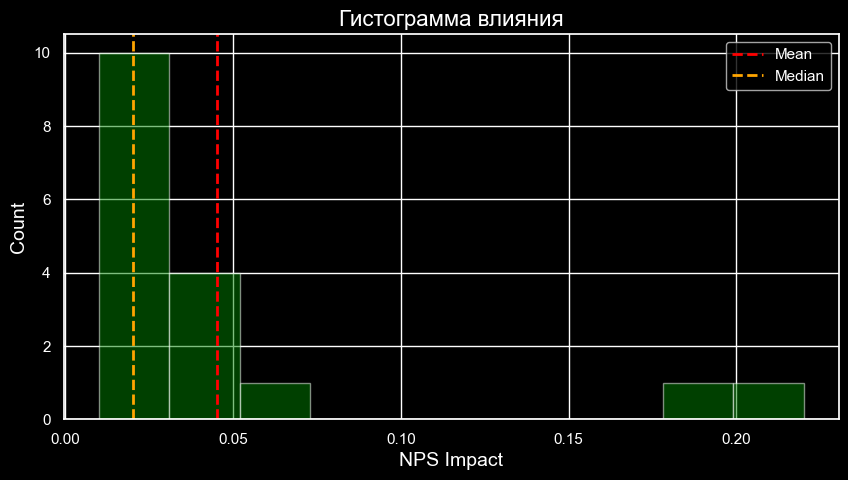

In [394]:
plt.figure(figsize=(10,5))
plt.hist(grouped_data['nps_impact_pct'], bins=10, alpha=0.5, color='green')

plt.axvline(grouped_data['nps_impact_pct'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(grouped_data['nps_impact_pct'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')

plt.xlabel('NPS Impact', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Гистограмма влияния', fontsize=16)
plt.legend()
plt.show()

прогноз, как изменится общий NPS при изменении доли абонентов с услугой конвергент

In [256]:
# Отфильтруем данные, чтобы они содержали только информацию за последний год
last_year_data =grouped_data[(grouped_data['date'] > '2022-12') & (grouped_data['date'] < '2023-05')]
# Создаем пустой DataFrame с нужными столбцами
forecast_table = pd.DataFrame(columns=['percent_change', 'new_nps'])
# Устанавливаем текущее значение nps_impact_pct и называет столбцы DataFrame
nps_impact_pct = last_year_data['nps_impact_pct'].mean()
old_nps = last_year_data['nps_key_y'].mean()
forecast_table.loc[0] = [0, old_nps]
# Прогнозируем новые значения
for i in range(1, 21):
    change_percent = i
    new_nps = old_nps + (nps_impact_pct * old_nps * change_percent / 100)
    forecast_table.loc[i] = [i, new_nps]
# Выводим DataFrame с прогнозными значениями
forecast_table
#В результате выполнения этого кода будет создан DataFrame "forecast_table", состоящий из двух столбцов: "percent_change" и "new_nps". Строки в DataFrame соответствуют прогнозным значениям для каждого процента изменения доли "nps_impact_pct" в интервале от 1 до 20. Нулевая строка содержит текущее значение общего NPS.


,percent_change,new_nps
0,0.0,0.323418
1,1.0,0.323823
2,2.0,0.324227
3,3.0,0.324631
4,4.0,0.325036
5,5.0,0.325440
6,6.0,0.325844
7,7.0,0.326248
8,8.0,0.326653
9,9.0,0.327057


визуализация результатов влияния 

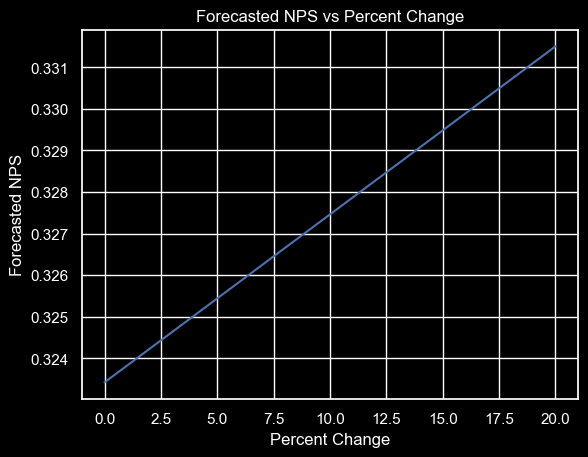

In [403]:

# визуализация результатов влияния 
plt.plot(forecast_table['percent_change'], forecast_table['new_nps'], 'b')
plt.title('Forecasted NPS vs Percent Change')
plt.xlabel('Percent Change')
plt.ylabel('Forecasted NPS')
#plt.grid(False)
plt.show()

In [78]:
data = df.copy()

In [80]:
data.head()

,create_date,cluster_name,macroregion,region,branch_id,cust_id,subs_id,msisdn,point_name,nps,...,data_gb,data_gr,CREATE_DTTM,EVENT_DATE_TO_RTK,EVENT_DATE_INSTAL,ALLADIN_SYSTEM,LAST_STATUS_NAME,REASON,diff_day,flg_conv
0,2022-06-02,Challenger,Урал,Екатеринбург,99.0,3.000006e+11,3.000007e+11,79505629758,Мобильный интернет,10,...,30.782479,от 30-50,NaT,None,NaT,None,None,None,NaN,0
1,2023-02-16,Defender,Волга,Н.Новгород,13.0,2.000859e+11,2.000846e+11,79200410377,Контакт-центр,9,...,9.405447,10,NaT,None,NaT,None,None,None,NaN,0
2,2022-12-01,Challenger,Сибирь,Новосибирск,23.0,1.000609e+11,1.000608e+11,79014587512,Мобильный интернет,1,...,115.899388,100+,NaT,None,NaT,None,None,None,NaN,0
3,2022-04-04,Challenger,Юг,Волгоград,64.0,6.290447e+07,6.208242e+07,79023855002,Мобильный интернет,10,...,10.399204,от 10-30,NaT,None,NaT,None,None,None,NaN,0
4,2023-02-20,Challenger Elite,Сибирь,Томск,24.0,1.000230e+11,1.000230e+11,79539132401,Мобильный интернет,10,...,10.281038,от 10-30,NaT,None,NaT,None,None,None,NaN,0


In [109]:
total_count = len(data) # общее число абонентов
konvergent_count = data['flg_conv'].sum() # число абонентов с услугой "Конвергент"
konvergent_share = konvergent_count / total_count
non_konvergent_share = (total_count - konvergent_count) / total_count


In [87]:
print('Доля абонентов с услугой "Конвергент":', konvergent_share)
print('Доля абонентов без услуги "Конвергент":', non_konvergent_share)

Доля абонентов с услугой "Конвергент": 0.0017039157629611112
Доля абонентов без услуги "Конвергент": 0.9982960842370389


<Axes: xlabel='flg_conv', ylabel='count'>

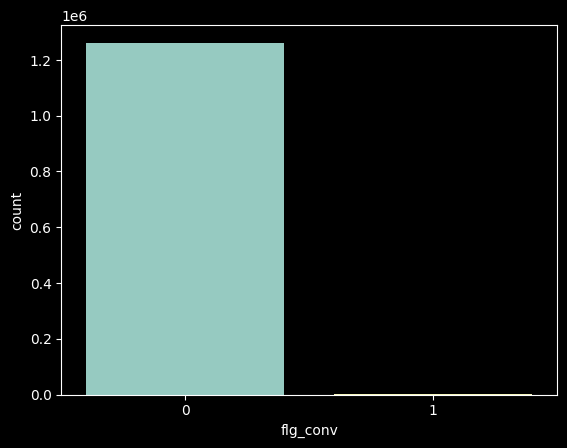

In [49]:
data= df.copy()

In [46]:
# Определяем категории для оценок
def nps_categories(nps):
    if nps >= 9:
        return 'PROMOTER'
    elif nps <= 6:
        return 'DETRACTOR'
    else:
        return 'PASSIVE'

# Создаем новый столбец с категориями
df['NPS_category'] = df['nps'].apply(nps_categories)

# Вычисляем проценты для каждой категории
promoter_pct = df.loc[df['NPS_category'] == 'PROMOTER'].shape[0] / df.shape[0]
detractor_pct = df.loc[df['NPS_category'] == 'DETRACTOR'].shape[0] / df.shape[0]
passive_pct = df.loc[df['NPS_category'] == 'PASSIVE'].shape[0] / df.shape[0]

# Создаем новые столбцы с процентами
df['PROMOTER_score'] = promoter_pct
df['DETRACTOR_score'] = detractor_pct
df['PASSIVE_score'] = passive_pct

# Создаем новый столбец с NPS_score
df['NPS_score'] = promoter_pct - detractor_pct

In [ ]:
# агрегаиция и влияние
# Сгруппируем данные по месяцам и посчитаем средний NPS и число абонентов с flg_conv=1
grouped_data = data[data['flg_conv'] == 1].groupby('date').agg({
    'nps': 'mean',
    'subs_id': 'nunique'
}).reset_index()



# Создадим новый DataFrame, куда добавим столбец с общим числом абонентов
total_subs = data.groupby('date').agg({'subs_id': 'nunique'}).reset_index()
grouped_data = pd.merge(grouped_data, total_subs, on='date')

# Добавим столбец с долей абонентов с flg_conv=1
grouped_data['conv_share'] = grouped_data['subs_id_x'] / grouped_data['subs_id_y']


# Добавим столбец с влиянием на общий NPS
grouped_data['nps_impact'] = grouped_data['conv_share'] * grouped_data['nps']

# Оставим только нужные столбцы
result = grouped_data[['date', 'nps_impact']]
result

In [ ]:
# преобразуем столбец create_date в тип datetime
df['create_date'] = pd.to_datetime(df['create_date'])
# группируем данные по точке продаж и дню создания, далее на основе сгруппированных данных создаем еще один датафрэйм и переводим индекс временного ряда в месяцы
df_month = df.groupby(['point_name', pd.Grouper(key='create_date', freq='M')], as_index=False).agg({"subs_id": "count", "diff_day": "count", "nps_key": "mean" })
df_month